___
# Arkmind-Vivian.lim Assessment
___

### Submission Requirements
* A Jupyter notebook or script containing the code for data loading, preprocessing, model training, and evaluation.
* A brief explanation of your approach, including any insights gained from the data and the rationale behind your choice of model.
* Any additional comments or observations about the dataset or the task.
* Requirements.txt


### Evaluation Criterias
* Clarity and organization of the code. (10%)
* Correctness of the model implementation. (50%)
* Accuracy and thoroughness of the model evaluation. (20%)
* Explanation of the approach and choice of model. (20%)

## Data Loading

In [1]:
import pandas as pd
pd.options.display.max_rows= None
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_csv('Technical_Assessment_AI_Engineer_1\data.csv')
data.head()

,id,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,PT 2344 JLN SRI PERASING,4/2 TMN SRI PERASING JAYA,JABOR,TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,UNIT A-11-9 DOMAIN 2,LINGKARAN CYBER POINT BARAT,TAMAN NEOCYBER,SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION
2,00ec2449-39df-4018-881c-2185dcaea9ab,49000.0,6000.0,"3346JLN PASIR PUTEH,KG TEMBESU LIMBAT",NaN,NaN,KELANTAN,KOTA BHARU,16150.0,REJECTED,4000.0,24,18,6000,SALE ADVISOR,DEBTS CONSOLIDATION
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,"NO 1319, JALAN CEMPAKA INDAH 16",TAMAN CEMPAKA INDAH,BUKIT SELAMBAU,KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,PT 2326,TAMAN ROS SETIA,JUASSEH,NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION


## Data Exploratory & Preprocessing

<AxesSubplot:>

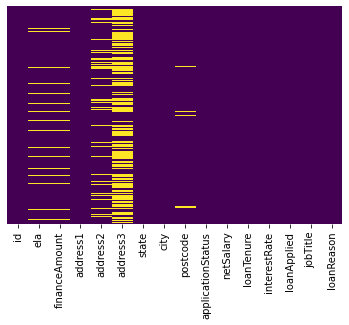

In [3]:
# check where we are missing data
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [4]:
# drop address 2,3 as null value is high and inconsistant data 

data.drop(['address1','address2','address3'], axis=1,inplace= True)
data.columns

Index(['id', 'ela', 'financeAmount', 'state', 'city', 'postcode',
       'applicationStatus', 'netSalary', 'loanTenure', 'interestRate',
       'loanApplied', 'jobTitle', 'loanReason'],
      dtype='object')

<AxesSubplot:xlabel='applicationStatus', ylabel='count'>

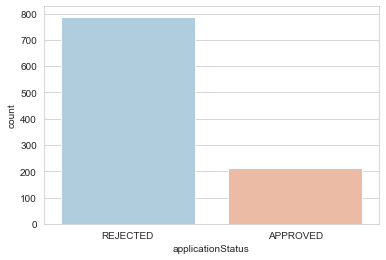

In [5]:
# check data balance

sns.set_style('whitegrid')
sns.countplot(x='applicationStatus', data=data, palette = 'RdBu_r')


# data is imbalance 
# consider class weight & SMOTE (oversampling) method

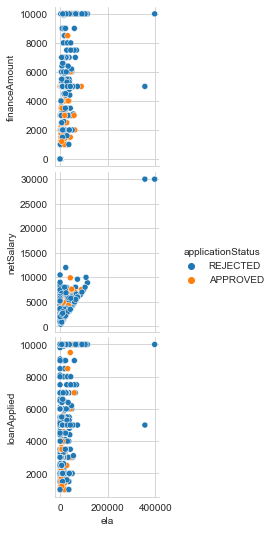

In [6]:
# study ela

ela_explore = data [['ela','financeAmount','netSalary','loanApplied','applicationStatus']]
sns.pairplot(ela_explore, hue='applicationStatus',x_vars=['ela'], y_vars=['financeAmount','netSalary','loanApplied'])

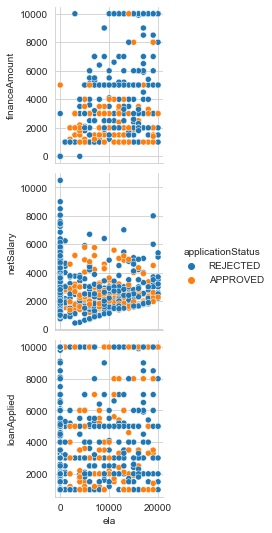

In [7]:
# remove ela outlier

data = data[data['ela']<= 20000]
ela_explore = data [['ela','financeAmount','netSalary','loanApplied','applicationStatus']]
sns.pairplot(ela_explore, hue='applicationStatus',x_vars=['ela'], y_vars=['financeAmount','netSalary','loanApplied'])

In [8]:
# data cleaning for postcode, state, city
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 680 non-null    object 
 1   ela                680 non-null    float64
 2   financeAmount      680 non-null    float64
 3   state              680 non-null    object 
 4   city               680 non-null    object 
 5   postcode           664 non-null    float64
 6   applicationStatus  680 non-null    object 
 7   netSalary          680 non-null    float64
 8   loanTenure         680 non-null    int64  
 9   interestRate       680 non-null    int64  
 10  loanApplied        680 non-null    int64  
 11  jobTitle           680 non-null    object 
 12  loanReason         680 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 74.4+ KB


In [9]:
# postcode mapping
data[data['postcode'].isnull()]

,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
292,2c40878b-aa10-4b65-b27a-9b55dbaba256,0.0,5000.0,PENANG,TASEK GELUGOR,NaN,APPROVED,1800.00,24,18,10000,MARKETING,OTHER USAGE
318,3110c474-f4b6-4474-968a-bb0cf1030d5e,0.0,0.0,PAHANG,KUANTAN,NaN,REJECTED,2175.00,24,18,3000,EXECUTIVE OFFICER,OTHER USAGE
319,31112aa7-6570-4640-9afc-b2ccca57065c,5000.0,5000.0,SELANGOR,PETALING JAYA,NaN,APPROVED,2300.00,18,18,10000,GROUP SOUS CHEF,EDUCATION
479,4e024526-8899-4c3a-b0ee-5fd9672bf161,6000.0,3600.0,SELANGOR,BANTING,NaN,REJECTED,1670.00,24,18,3600,DRIVER LORI,DEBTS CONSOLIDATION
501,508afd39-2b79-4e9b-a565-d301494ad45c,17000.0,7000.0,PAHANG,KUANTAN,NaN,REJECTED,1800.00,24,18,7000,PRODUCTION ( PACKERMAN ),DEBTS CONSOLIDATION
502,50a77fae-caef-4efd-ad66-a3b41fa4f6cf,19000.0,5000.0,PENANG,BALIK PULAU,NaN,REJECTED,3000.00,24,18,5000,WAREHOUSE OPERATIONS,DEBTS CONSOLIDATION
567,5b725c3d-c846-4852-a19e-d099d699f7e6,18000.0,10000.0,MELAKA,MELAKA,NaN,REJECTED,1800.00,24,18,10000,CUSTOMER SERVICE,RENOVATION
730,771312cb-bd28-45bb-95e5-35d486be9ceb,0.0,0.0,KEDAH,GURUN,NaN,REJECTED,1652.29,24,18,10000,PENGAWAS HUTAN,OTHER USAGE
733,778c3db0-6b26-482a-b538-e7a87d1b24a9,10000.0,5000.0,JOHOR,SIMPANG RENGAM,NaN,REJECTED,2400.00,24,18,5000,CLERK,RENOVATION
801,82b0382b-d05e-4d2f-a078-083c481c8dea,12000.0,10000.0,SELANGOR,PETALING JAYA,NaN,REJECTED,2106.35,24,18,10000,RECOVERY OFFICER,DEBTS CONSOLIDATION


In [10]:
data[data['id']=='2c40878b-aa10-4b65-b27a-9b55dbaba256']

,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
292,2c40878b-aa10-4b65-b27a-9b55dbaba256,0.0,5000.0,PENANG,TASEK GELUGOR,NaN,APPROVED,1800.0,24,18,10000,MARKETING,OTHER USAGE


In [11]:
# mapping of postcode to mode value

def fillna_mode(x):
    mode_value = x.mode()
    if len(mode_value) > 0:
        return x.fillna(mode_value[0])
    else:
        return x  # If no mode, return as is

# Fill NaN values with mode based on Category
data['postcode'] = data['postcode'].fillna(data.groupby('city')['postcode'].transform(fillna_mode))

data[data['postcode'].isnull()]

,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
803,833d02ca-ebb6-4429-8762-2ac2e7419001,9000.0,7000.0,SARAWAK,SONG,NaN,REJECTED,1586.14,24,18,7000,CUSTOMER SERVICES,DEBTS CONSOLIDATION


In [12]:
# city = 'SONG' is the unique line manual postcode mapping based on customer address and obtain postcode from internet
# 96850

data['postcode'] = data['postcode'].fillna('96850')
data[data['postcode'].isnull()]

,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason


In [13]:
data.describe()

,ela,financeAmount,netSalary,loanTenure,interestRate,loanApplied
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,6663.235294,2536.470588,2671.636853,21.591176,17.995588,5089.117647
std,6521.052447,2861.139646,1328.437780,5.020480,0.115045,3195.103828
min,0.000000,0.000000,450.000000,6.000000,15.000000,1000.000000
25%,0.000000,0.000000,1787.735000,24.000000,18.000000,2200.000000
50%,5000.000000,1800.000000,2400.000000,24.000000,18.000000,5000.000000
75%,12000.000000,4000.000000,3061.500000,24.000000,18.000000,8000.000000
max,20000.000000,10000.000000,10500.000000,24.000000,18.000000,10000.000000


#### Finance Amount

(array([228.,   0.,   0.,  81.,  26.,   9.,  70.,  14.,   0.,  54.,  11.,
          0.,  26.,   1.,   0.,  75.,   4.,   1.,  11.,   3.,   0.,  10.,
          0.,   0.,   6.,   2.,   0.,   3.,   0.,  45.]),
 array([    0.        ,   333.33333333,   666.66666667,  1000.        ,
         1333.33333333,  1666.66666667,  2000.        ,  2333.33333333,
         2666.66666667,  3000.        ,  3333.33333333,  3666.66666667,
         4000.        ,  4333.33333333,  4666.66666667,  5000.        ,
         5333.33333333,  5666.66666667,  6000.        ,  6333.33333333,
         6666.66666667,  7000.        ,  7333.33333333,  7666.66666667,
         8000.        ,  8333.33333333,  8666.66666667,  9000.        ,
         9333.33333333,  9666.66666667, 10000.        ]),
 <BarContainer object of 30 artists>)

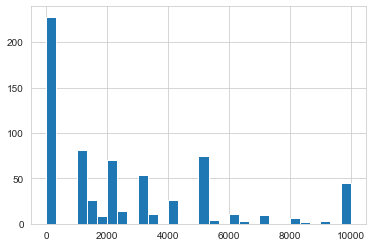

In [14]:
sns.set_style('whitegrid')
plt.hist(data['financeAmount'],bins=30)

# Most of the approved fall between RM1000- RM5000
# Bining to 
# Very Low: 0 - 1000
# Low: 1001 - 2000
# Medium: 2001 - 3000
# High: 3001 - 5000
# Very High: 5001 - 10000



In [15]:
bins = [-1, 1001, 2001, 3001, 5001, 10000]
data['financeAmountBin'] = pd.cut(data['financeAmount'],bins = bins, labels=['very_low','low','medium','high','very_high'])
data.head()

,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason,financeAmountBin
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION,high
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION,very_low
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION,very_low
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION,very_low
6,01b2377a-0bfd-453f-a5c9-48f708aeed81,3000.0,3000.0,SARAWAK,KUCHING,93050.0,REJECTED,3754.0,24,18,5000,TEACHER,EDUCATION,medium


#### Net Salary

(array([  7.,  16.,  37., 111., 106.,  76.,  85.,  78.,  35.,  28.,  18.,
         14.,  13.,  15.,  10.,  11.,   4.,   3.,   1.,   2.,   3.,   1.,
          3.,   0.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([  450.,   785.,  1120.,  1455.,  1790.,  2125.,  2460.,  2795.,
         3130.,  3465.,  3800.,  4135.,  4470.,  4805.,  5140.,  5475.,
         5810.,  6145.,  6480.,  6815.,  7150.,  7485.,  7820.,  8155.,
         8490.,  8825.,  9160.,  9495.,  9830., 10165., 10500.]),
 <BarContainer object of 30 artists>)

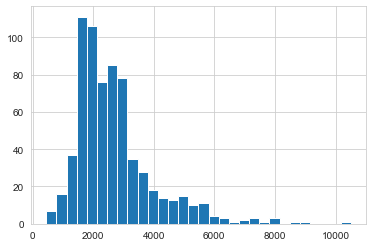

In [16]:
sns.set_style('whitegrid')
plt.hist(data['netSalary'],bins=30)

# Most of the salary fall between RM1000- RM5000
# Bining to 
# Very Low: 0 - 2000
# Low: 2001 - 3000
# Medium: 3001 - 4000
# High: 4001 - 5000
# Very High: 5001 - 10000

In [17]:
bins = [-1, 2001, 3001, 4001, 5001, 10000]
data['netSalaryBin'] = pd.cut(data['netSalary'],bins = bins, labels=['very_low','low','medium','high','very_high'])
data.head()

,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason,financeAmountBin,netSalaryBin
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION,high,very_low
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION,very_low,very_high
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION,very_low,very_low
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION,very_low,medium
6,01b2377a-0bfd-453f-a5c9-48f708aeed81,3000.0,3000.0,SARAWAK,KUCHING,93050.0,REJECTED,3754.0,24,18,5000,TEACHER,EDUCATION,medium,medium


#### Amount Applied

(array([ 66.,  29.,  11.,  63.,   6.,  25.,  65.,  10.,  23.,   0.,  22.,
          9.,   2.,  96.,  11.,   9.,  33.,   1.,   6.,   0.,  13.,   1.,
          0.,  14.,   0.,   3.,   3.,   1.,   0., 158.]),
 array([ 1000.,  1300.,  1600.,  1900.,  2200.,  2500.,  2800.,  3100.,
         3400.,  3700.,  4000.,  4300.,  4600.,  4900.,  5200.,  5500.,
         5800.,  6100.,  6400.,  6700.,  7000.,  7300.,  7600.,  7900.,
         8200.,  8500.,  8800.,  9100.,  9400.,  9700., 10000.]),
 <BarContainer object of 30 artists>)

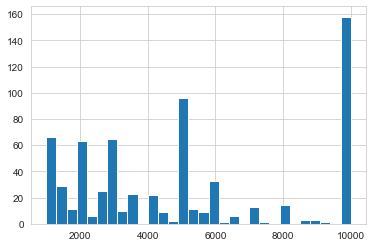

In [18]:
sns.set_style('whitegrid')
plt.hist(data['loanApplied'],bins=30)

# Most of the salary fall between RM1000- RM5000
# Bining to 
# Very Low: 0 - 1000
# Low: 1001 - 2000
# Medium: 2001 - 3000
# High: 3001 - 5000
# Very High: 5001 - 10000

In [19]:
bins = [-1, 1001, 2001, 3001, 5001, 10000]
data['loanAppliedBin'] = pd.cut(data['loanApplied'],bins = bins, labels=['very_low','low','medium','high','very_high'])
data.head()

,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason,financeAmountBin,netSalaryBin,loanAppliedBin
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION,high,very_low,high
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION,very_low,very_high,very_high
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION,very_low,very_low,low
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION,very_low,medium,high
6,01b2377a-0bfd-453f-a5c9-48f708aeed81,3000.0,3000.0,SARAWAK,KUCHING,93050.0,REJECTED,3754.0,24,18,5000,TEACHER,EDUCATION,medium,medium,high


#### Loan Tenure

In [20]:
bins = [1, 3.1, 6.1, 9.1, 12.1, 15.1, 18.1, 21.1, 24.1]
data['loanTenureBin'] = pd.cut(data['loanTenure'],bins = bins, labels=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8'])
data.head()

,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason,financeAmountBin,netSalaryBin,loanAppliedBin,loanTenureBin
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION,high,very_low,high,Q6
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION,very_low,very_high,very_high,Q8
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION,very_low,very_low,low,Q4
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION,very_low,medium,high,Q8
6,01b2377a-0bfd-453f-a5c9-48f708aeed81,3000.0,3000.0,SARAWAK,KUCHING,93050.0,REJECTED,3754.0,24,18,5000,TEACHER,EDUCATION,medium,medium,high,Q8


#### Interest Rate

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 679.]),
 array([15. , 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16. ,
        16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17. , 17.1,
        17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18. ]),
 <BarContainer object of 30 artists>)

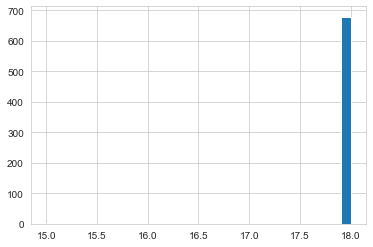

In [21]:
sns.set_style('whitegrid')
plt.hist(data['interestRate'],bins=30)

# Most of the approved fall between RM1000- RM5000
# Bining to 
# Very Low: 0 - 15
# Low: 15.1 - 15.5
# Medium: 15.6 - 16.0
# Medium High:  - 16.1 - 16.5
# High: 16.5 - 17.0
# Very High:  - 17.1 - 17.5
# Super High: 17.5 - 18.0


In [22]:
bins = [0, 15.1, 15.6, 16.1, 16.6, 17.1, 17.7, 18.1]
data['interestRateBin'] = pd.cut(data['interestRate'],bins = bins, labels=['very_low','low','medium','medium_high','high','very_high', 'super_high'])
data.head()

,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason,financeAmountBin,netSalaryBin,loanAppliedBin,loanTenureBin,interestRateBin
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION,high,very_low,high,Q6,super_high
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION,very_low,very_high,very_high,Q8,super_high
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION,very_low,very_low,low,Q4,super_high
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION,very_low,medium,high,Q8,super_high
6,01b2377a-0bfd-453f-a5c9-48f708aeed81,3000.0,3000.0,SARAWAK,KUCHING,93050.0,REJECTED,3754.0,24,18,5000,TEACHER,EDUCATION,medium,medium,high,Q8,super_high


### Modeling

In [23]:
from sklearn.preprocessing import OneHotEncoder #choose one-hot as the categorical data does not has no inherent order
# from sklearn.preprocessing import LabelEncoder #choose one-hot as the categorical data-> binned columns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
 

In [24]:
data['postcode'] = data['postcode'].astype(str)
encode_columns = ['state','city','postcode','jobTitle','loanReason','financeAmountBin','netSalaryBin','loanTenureBin','interestRateBin','loanAppliedBin']
encoded_columns = pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(data[encode_columns]))

encoded_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,954,955,956,957,958,959,960,961,962,963
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
final_data = pd.concat([data[['ela','applicationStatus']].reset_index(), encoded_columns],axis =1)
len(encoded_columns)

680

In [26]:
# columns_to_encode = ['financeAmountBin','netSalaryBin','loanTenureBin','interestRateBin','loanAppliedBin']
# for col in columns_to_encode:
#     final_data[col] = LabelEncoder().fit_transform(final_data[col])

# final_data.head()

In [27]:
x = final_data.loc[:, final_data.columns != 'applicationStatus']
y = final_data['applicationStatus']

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
# apply clasweight due to imbalance data
# y.value_counts() --> ratio 31:105
lr = LogisticRegression(class_weight={'REJECTED':31,'APPROVED':105})
lr.fit(xtrain,ytrain)

c:\Users\vivia\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={'APPROVED': 105, 'REJECTED': 31})

In [29]:
predictions = lr.predict(xtest)

In [30]:
print (classification_report(ytest,predictions))

              precision    recall  f1-score   support

    APPROVED       0.38      0.70      0.49        27
    REJECTED       0.91      0.72      0.80       109

    accuracy                           0.71       136
   macro avg       0.64      0.71      0.65       136
weighted avg       0.80      0.71      0.74       136



In [31]:
final_data.head()

,index,ela,applicationStatus,0,1,2,3,4,5,6,...,954,955,956,957,958,959,960,961,962,963
0,0,5000.0,REJECTED,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.0,REJECTED,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,6000.0,APPROVED,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,0.0,REJECTED,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6,3000.0,REJECTED,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
